### Assignment 2

### Github Link - https://github.com/adityamurali

##### Import libraries

In [1]:
import numpy as np
import pandas as pd

##### 1) Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [2]:
df = pd.read_csv("Batting.csv")

#####  2) Print out the dimensions and info about the dataframe you just created

In [3]:
print(df.shape)

(102816, 25)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [5]:
df.head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


##### 3) How many players have hit 40 or more home runs in a single season? (Number Only)

In [6]:
df[df['HR']>=40].nunique()[0]

142

##### 4) How many players have hit 600 or more home runs in their career? (Dataframe with name and player first and last name only and amount of HRs)

In [7]:
df_hr = df.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['HR']].sum()
df_hr[df_hr['HR'] > 600][['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
1,Hank,Aaron,755
1542,Barry,Bonds,762
6633,Ken,Griffey,630
10857,Willie,Mays,660
14528,Alex,Rodriguez,696
14865,Babe,Ruth,714
16103,Sammy,Sosa,609
17004,Jim,Thome,612


##### 5) How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [8]:
df[(df['2B'] >= 40) & (df['3B'] >= 10) & (df['H'] >= 200) & (df['HR'] >= 30)]['playerID'].nunique()

11

##### 6) How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs)

In [9]:
df[df['SB'] >= 100][['nameFirst','nameLast','yearID','SB']].sort_values('SB', ascending = False)

,nameFirst,nameLast,yearID,SB
3667,Hugh,Nicol,1887,138.0
59616,Rickey,Henderson,1982,130.0
3617,Arlie,Latham,1887,129.0
51853,Lou,Brock,1974,118.0
3501,Charlie,Comiskey,1887,117.0
3764,John,Ward,1887,111.0
4278,Billy,Hamilton,1889,111.0
5232,Billy,Hamilton,1891,111.0
62410,Vince,Coleman,1985,110.0
64425,Vince,Coleman,1987,109.0


##### 7) How many players in the 1960s have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [10]:
#Define year range
yearlist = list(range(1960,1970))

#Select data that lies in the year range
df_200hr = df[df['yearID'].isin(yearlist)]

#Group the player records and find the total HR for each player
df_a = df_200hr.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['HR']].sum()

#Display details of players with 200 or more HRs
df_a[df_a['HR'] >= 200][['nameFirst','nameLast', 'HR']].sort_values(by = 'HR', ascending = False)

,nameFirst,nameLast,HR
856,Harmon,Killebrew,393
0,Hank,Aaron,375
1044,Willie,Mays,350
1372,Frank,Robinson,316
1057,Willie,McCovey,300
751,Frank,Howard,288
279,Norm,Cash,278
70,Ernie,Banks,269
1009,Mickey,Mantle,256
283,Orlando,Cepeda,254


##### 8) Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [11]:
#Group the player records and find the total HR for each player
dfhr = df.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['HR']].sum()

#Display details of the player with highest HR
dfhr[['nameFirst','nameLast','HR']].sort_values(by = 'HR', ascending = False).nlargest(1, 'HR')

,nameFirst,nameLast,HR
1542,Barry,Bonds,762


##### 9) Who had the most hits in the 1970s? (Dataframe)

In [12]:
#Define year range
y = list(range(1970,1980))

#Select data that lies within the year range
df_mosthit = df[df['yearID'].isin(y)]

#Group the players and find the total of Hits for each player. Then display details of player with most hits
df_mosthit.groupby(['playerID','nameFirst','nameLast'], as_index= False)['H'].sum().nlargest(1, 'H')

,playerID,nameFirst,nameLast,H
1639,rosepe01,Pete,Rose,2045


##### 10) Top 5 highest OBP with at least 500 PAs in 1977? (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [13]:
#Calculate OBP and append to original dataframe
df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['BB'] + df['HBP'] + df['SF'])

#Calculate PA and append to original dataframe
df['PA'] = df['AB'] + df['BB'] + df['HBP'] + df['SF']

#Select players with at least 500 PAs in 1977. Display details of those with the top 5 OBPs.
df[(df['PA'] >= 500) & (df['yearID'] == 1977)].nlargest(5, 'OBP')[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
54603,Rod,Carew,0.448773
55273,Ken,Singleton,0.437788
55280,Reggie,Smith,0.426910
54820,Mike,Hargrove,0.420312
55095,Joe,Morgan,0.417054


##### 11) Top 8 highest averages with at least 300 PAs in 2013? (Dataframe, first name, last name, average, descending by average)

In [14]:
#Calculate Batting Average and append it to the original dataframe
df['BA'] = df['H']/df['AB']

#Select players with at least 300 PAs in 2013. Display details of those with the 8 highest averages.
df[(df['PA'] >= 300) & (df['yearID'] == 2013)].nlargest(8, 'BA')[['nameFirst','nameLast','BA']]

,nameFirst,nameLast,BA
97188,Miguel,Cabrera,0.347748
98062,Hanley,Ramirez,0.345395
97300,Michael,Cuddyer,0.331288
97825,Joe,Mauer,0.323596
98293,Mike,Trout,0.322581
97651,Chris,Johnson,0.321012
97437,Freddie,Freeman,0.319419
98043,Yasiel,Puig,0.319372


##### 12) Leaders in hits from 1940 up to and including 1949 (Dataframe, first name, last name, number of hits)

In [15]:
#Define year range
yr = list(range(1940,1950))

#Select data that lies within the year range and group the players. Find  the total Hits of the players.
df_hitlead = df[df['yearID'].isin(yr)].groupby(['playerID','nameFirst','nameLast'], as_index = False)[['nameFirst','nameLast','H']].sum()

#Sort hits in descending order
df_hitlead.sort_values(by = 'H', ascending = False)[['nameFirst','nameLast','H']]

,nameFirst,nameLast,H
138,Lou,Boudreau,1578
427,Bob,Elliott,1563
1576,Dixie,Walker,1512
1103,Stan,Musial,1432
390,Bobby,Doerr,1407
712,Tommy,Holmes,1402
33,Luke,Appling,1376
1127,Bill,Nicholson,1328
961,Marty,Marion,1310
239,Phil,Cavarretta,1304


##### 13) Who led the MLB with the most hits most times? And how many times? (Dataframe, Number of hits)

In [16]:
#For each season find the maximum number of hits
dfmaxeachyr = df.groupby(['yearID'], as_index = False)[['H']].max()

#Find the number of hits for each player over the seasons
dfsumplayerhr = df.groupby(['yearID','playerID','nameFirst','nameLast'],as_index = False)[['H']].sum()

#Merge both dataframes created
a = pd.merge(dfsumplayerhr, dfmaxeachyr, on = ['yearID','H'])

#Arrange details based on descending order of H
b = a.groupby('playerID', as_index = False).count().sort_values(by = 'H', ascending = False)

#Display details of player who led MLB with most hits most times
b.nlargest(1, 'H')[['playerID','H']]

,playerID,H
85,suzukic01,7


##### 14) Which players have played the most games for their careers? Top 5 first name, last name, descending by games played presented as a dataframe.

In [17]:
dfmost = df.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['G']].sum().nlargest(5,'G')
dfmost[['nameFirst','nameLast','G']]

,nameFirst,nameLast,G
14719,Pete,Rose,3562
18728,Carl,Yastrzemski,3308
1,Hank,Aaron,3298
7383,Rickey,Henderson,3081
3155,Ty,Cobb,3035


##### 15) How many players have had 3000 or more hits for their careers while also hitting 500 or more HRs? Just a number is okay here.

In [18]:
df3000h = df.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['H','HR']].sum()

#Number of players with 3000 or more hits and 500 or more HRs
len(df3000h[(df3000h['H'] >= 3000) & (df3000h['HR'] >= 500)])

5

##### 16) How many HRs were hit during the 1988 season? Just a number is okay here.

In [19]:
df[df['yearID'] == 1988]['HR'].sum()

3180

##### 17) Top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs. Dataframe, first name, last name, average, descending by average.

In [20]:
df[(df['AB']>= 500) & (df['nameFirst']=='Wade') & (df['nameLast']=='Boggs')].nlargest(3,'BA')[['nameFirst','nameLast','BA']]

,nameFirst,nameLast,BA
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


##### 18) Top 10 OBPs for 1995 season with 400 or more PAs. Dataframe with first name, last name, OBP.

In [21]:
df[(df['yearID']==1995) & (df['PA']>=400)].nlargest(10,'OBP')[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
73578,Edgar,Martinez,0.478873
73996,Frank,Thomas,0.454405
73611,Mark,McGwire,0.440758
73999,Jim,Thome,0.438061
73002,Barry,Bonds,0.431496
73875,Tim,Salmon,0.429467
73145,Chili,Davis,0.429119
73560,Dave,Magadan,0.427553
73495,Chuck,Knoblauch,0.424483
73671,Tim,Naehring,0.414729


##### 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs.

In [22]:
#Define the year range
yran = [1922,1925,1926,1928]

#Group players and find total number of 3Bs for each player
df3b = df[df['yearID'].isin(yran)].groupby(['playerID','nameFirst','nameLast'], as_index= False)['3B'].sum()

#Display details of player with most 3Bs
df3b.nlargest(1,'3B')[['nameFirst','nameLast','3B']]

,nameFirst,nameLast,3B
1011,Curt,Walker,59


##### 20) How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases? A number is okay here.

In [23]:
df[(df['HR'] >= 30) & (df['SB'] >= 30)]['playerID'].nunique()

37

##### 21) Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [24]:
df[(df['yearID'] == 1986) & (df['AB'] >= 400)].nlargest(1,'OBP')[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
63320,Wade,Boggs,0.45283


##### 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP).

In [25]:
df[(df['yearID'] == 1997) & (df['AB'] >= 400) & (df['lgID'] == 'NL')].nlargest(1,'OBP')[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
76562,Larry,Walker,0.451807


##### 23) Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [26]:
#Find the average of NL
avgNL = df[(df['yearID'] == 2012) & (df['AB'] >= 500) & (df['lgID'] == 'NL')][['HR']].mean()[0]

#Find the average of AL
avgAL = df[(df['yearID'] == 2012) & (df['AB'] >= 500) & (df['lgID'] == 'AL')][['HR']].mean()[0]

#Select data from NL that satisfies the conditions 
dataNL = df[(df['yearID'] == 2012) & (df['AB'] >= 500) & (df['lgID'] == 'NL') & (df['HR'] > avgNL)]

#Select data from AL that satisifes the condtions
dataAL = df[(df['yearID'] == 2012) & (df['AB'] >= 500) & (df['lgID'] == 'AL') & (df['HR'] > avgAL)]

#Concatente dataNL and dataAL into one data source. Display details after sorting HR in descending order
databothlg = pd.concat([dataNL,dataAL])
databothlg[['nameFirst','nameLast','HR']].sort_values(by = 'HR', ascending = False)

,nameFirst,nameLast,HR
95768,Miguel,Cabrera,44
96114,Josh,Hamilton,43
96081,Curtis,Granderson,43
95969,Edwin,Encarnacion,42
95728,Ryan,Braun,41
95952,Adam,Dunn,41
95687,Adrian,Beltre,36
96971,Josh,Willingham,35
95741,Jay,Bruce,34
96301,Adam,LaRoche,33


##### 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [27]:
#Create a calculated field Age
df['Age'] = df['yearID'] - df['birthYear']

#Select data where HR more than or equal to 50
dfmin50 = df[df['HR'] >= 50]

#Display details of youngest player
dfmin50.nsmallest(1,'Age')[['nameFirst','nameLast','HR','yearID']]

,nameFirst,nameLast,HR,yearID
89082,Prince,Fielder,50,2007


##### 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [28]:
#Calculate cumulative sum of HR for each player after grouping them
a = df.groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID']).sum().groupby(level=0).cumsum()

#Select only those players with 300 or more HRs
b = a[a['HR'] >= 300].reset_index()

#Calculate their age at every season
b['Running Age'] = b['yearID'] - b['birthYear']

#We only need the year when the player crossed 300 HRs. The other rows can be discarded.
b.drop_duplicates('playerID').sort_values(by= 'Running Age').head(5)[['nameFirst','nameLast','yearID','HR']]

,nameFirst,nameLast,yearID,HR
213,Jimmie,Foxx,1935,302
520,Mel,Ott,1937,306
567,Albert,Pujols,2008,319
338,Andruw,Jones,2005,301
617,Alex,Rodriguez,2003,345


#### BONUS QUESTIONS

##### 26) Graph total HRs per season using bar graph

Text(0,0.5,'Total HR')

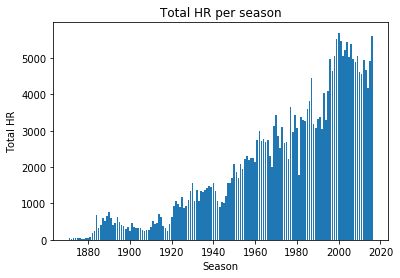

In [30]:
#Import the matplotlib library
import matplotlib.pyplot as plt

#Define year range
years = list(range(1871,2017))

#Find total HR for each season
hrbar =df.groupby(['yearID'],as_index = False)[['HR']].sum()['HR']

#Plot the bar graph
plt.bar(years, hrbar)
plt.title('Total HR per season')
plt.xlabel('Season')
plt.ylabel('Total HR')

##### 27) Using a line graph please graph the average HRs per AB (think about this) per season

Text(0,0.5,'Average HR per AB')

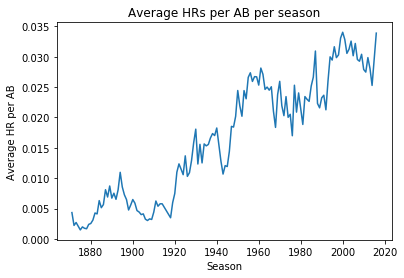

In [31]:
#Calculate average HR per AB
hrab = df.groupby(['yearID'], as_index = False)[['HR','AB']].sum()
hrab['HRperAB'] = hrab['HR'] / hrab['AB']

#Import matplotlib library
import matplotlib.pyplot as plt

#Plot the line graph
plt.plot(hrab['yearID'], hrab['HRperAB'])
plt.title('Average HRs per AB per season')
plt.xlabel('Season')
plt.ylabel('Average HR per AB')